### Name: Shweta Ghadshi
### BE CMPN B
### Roll No: 21102B0017

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data=pd.read_csv("tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.shape

(418, 12)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data.duplicated().sum()

0

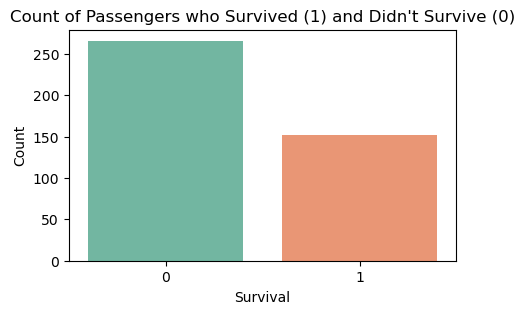

In [48]:
# Plotting the count of passengers who survived and didn't survive
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Survived', palette="Set2")
plt.title("Count of Passengers who Survived (1) and Didn't Survive (0)")
plt.xlabel("Survival")
plt.ylabel("Count")
plt.show()

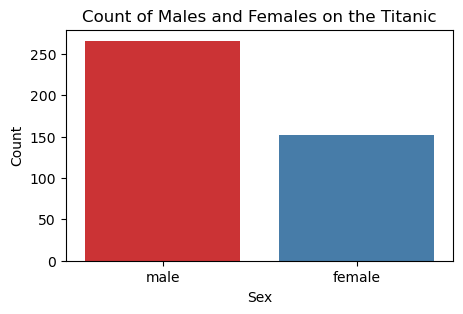

In [49]:
# Plotting the count of males and females on the Titanic
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Sex', palette="Set1")
plt.title("Count of Males and Females on the Titanic")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

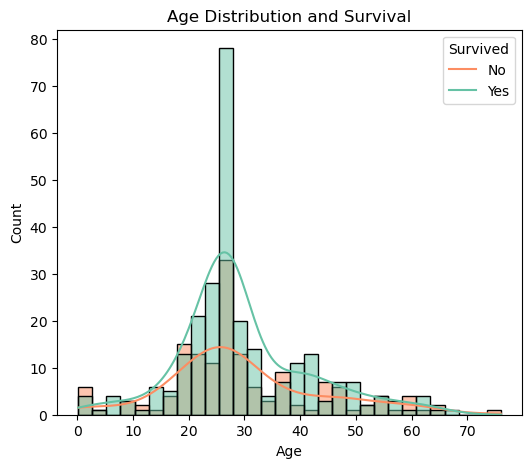

In [50]:
plt.figure(figsize=(6, 5))
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True, palette="Set2")
plt.title("Age Distribution and Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


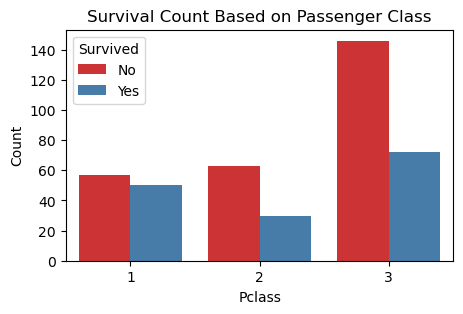

In [51]:
#class distribution and survival
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Pclass', hue='Survived', palette="Set1")
plt.title("Survival Count Based on Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

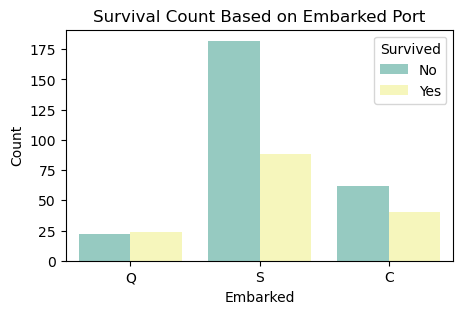

In [52]:
#embarkd port and survival
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Embarked', hue='Survived', palette="Set3")
plt.title("Survival Count Based on Embarked Port")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

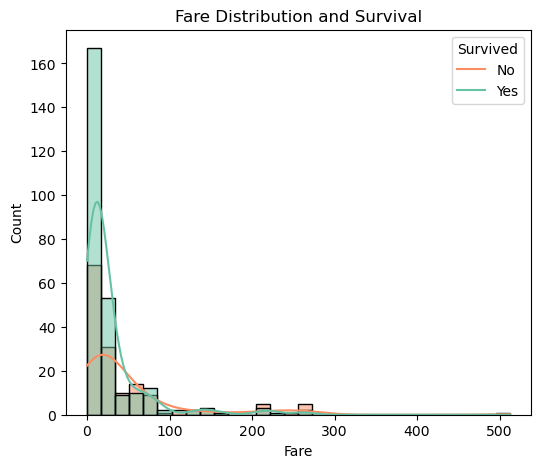

In [54]:
#fare distibution and survival
plt.figure(figsize=(6, 5))
sns.histplot(data=data, x='Fare', hue='Survived', bins=30, kde=True, palette="Set2")
plt.title("Fare Distribution and Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

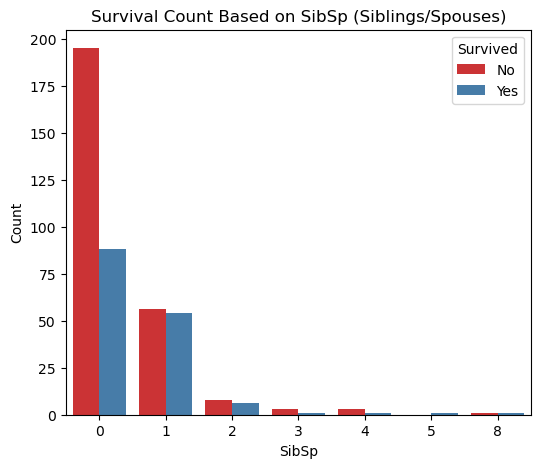

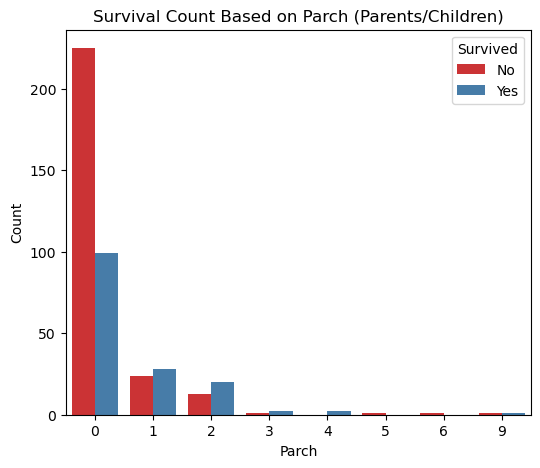

In [56]:
#sibling/spouse and children/parents and survival
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='SibSp', hue='Survived', palette="Set1")
plt.title("Survival Count Based on SibSp (Siblings/Spouses)")
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='Parch', hue='Survived', palette="Set1")
plt.title("Survival Count Based on Parch (Parents/Children)")
plt.xlabel("Parch")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [15]:
# Data Preprocessing
# cabin,name,passenger id,ticket no don't have any relation with survival so we are not considerring it
data.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1, inplace=True)
X = data.drop("Survived", axis=1)
y = data["Survived"]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [16]:
# Splitting the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# preprocessing steps for numeric and categorical data
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_features = ["Sex", "Embarked", "Pclass"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [18]:
# Define a list of classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [19]:
# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(report)
    print("\n")

Classifier: Random Forest
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Classifier: SVC
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



Classifier: Logistic Regression
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   ma

In [20]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
for clf_name, clf in classifiers.items():
    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    
    cross_val_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')
    
    print(f"Classifier: {clf_name}")
    print(f"Cross-Validation Accuracy: {np.mean(cross_val_scores) * 100:.2f}% (+/- {np.std(cross_val_scores) * 100:.2f}%)")
    print("\n")

Classifier: Random Forest
Cross-Validation Accuracy: 100.00% (+/- 0.00%)


Classifier: SVC
Cross-Validation Accuracy: 98.57% (+/- 0.47%)


Classifier: Logistic Regression
Cross-Validation Accuracy: 100.00% (+/- 0.00%)


Classifier: K-Nearest Neighbors
Cross-Validation Accuracy: 97.14% (+/- 1.78%)


Classifier: Gradient Boosting
Cross-Validation Accuracy: 100.00% (+/- 0.00%)




In [21]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
321,3,male,25.0,0,0,7.2292,C
324,1,female,39.0,0,0,211.3375,S
388,3,male,21.0,0,0,7.7500,Q
56,3,male,35.0,0,0,7.8958,S
153,3,female,36.0,0,2,12.1833,S
...,...,...,...,...,...,...,...
57,3,male,25.0,0,0,7.6500,S
126,3,male,22.0,0,0,7.7958,S
24,1,female,48.0,1,3,262.3750,C
17,3,male,21.0,0,0,7.2250,C


In [24]:
for column in X_test.columns:
    unique_values = X_test[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Pclass: [3 1 2]
Unique values in Sex: ['male' 'female']
Unique values in Age: [25.   39.   21.   35.   36.   50.   29.   49.   19.   27.   51.   16.
 28.   55.   10.   23.   57.   41.    3.   30.   18.5  32.   22.   33.
 24.   32.5  28.5  34.5  45.   47.   20.   26.    0.17 40.   15.   43.
 48.   18.  ]
Unique values in SibSp: [0 1 2 4]
Unique values in Parch: [0 2 1 9 3]
Unique values in Fare: [  7.2292 211.3375   7.75     7.8958  12.1833  26.       7.925   13.
   8.05    24.15    39.4      8.5167 108.9     56.4958   7.775   50.
  29.125   10.5     51.8625  13.775   15.2458   7.2833  55.4417  26.55
  22.525   39.6875 151.55    15.0458 211.5     23.45    39.6     27.7208
   7.8542  69.55    25.7      7.25     7.8292   7.225   13.8583  20.575
  14.5     11.5     39.       7.85     7.55    29.7    146.5208  21.
   7.5792  31.6833   8.6625  13.9     22.025    7.65     7.7958 262.375
   7.8792]
Unique values in Embarked: ['C' 'S' 'Q']


In [57]:
#predicting with a random passenger

# Define the passenger's data
passenger_data = pd.DataFrame({
    'Pclass': [3],
    'Sex': ['female'],
    'Age': [47],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7],
    'Cabin': ['Unknown'],
    'Embarked': ['S']
})

# Defining the model (using the Random Forest Classifier)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the best model on the entire dataset
model.fit(X, y)
prediction = model.predict(passenger_data)

#prediction
if prediction==1:
        answer="Passenger survived"
else: 
        answer="Passenger did not survive"
        
answer

'Passenger survived'